In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

When opening the data file, I have been receiving an error: "DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False." So I will have to specify column 3's data type. 

In [2]:
df = pd.read_csv("D:\Python\SPRINGBOARD\COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv",  dtype={'res_county': 'str'})

In [3]:
df.tail()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
28652759,2020-12,GA,13.0,NaN,NaN,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
28652760,2020-12,GA,13.0,NaN,NaN,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,NaN
28652761,2020-12,GA,13.0,NaN,NaN,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,NaN
28652762,2020-12,GA,13.0,NaN,NaN,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,NaN
28652763,2020-12,GA,13.0,NaN,NaN,18 to 49 years,Female,Unknown,Missing,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,NaN


I need to clean missing data from the following columns: symptom status, hospitalized, icu, death, underlying conditions.

In [17]:
df.describe()

,state_fips_code,county_fips_code,case_positive_specimen_interval,case_onset_interval
count,2.865109e+07,2.705965e+07,8.400369e+06,1.325580e+07
mean,2.537356e+01,2.531841e+04,2.368394e-01,9.220383e-02
std,1.584853e+01,1.580677e+04,1.833943e+00,1.526455e+00
min,1.000000e+00,1.001000e+03,-6.900000e+01,-4.500000e+01
25%,1.200000e+01,1.000300e+04,0.000000e+00,0.000000e+00
50%,2.500000e+01,2.502100e+04,0.000000e+00,0.000000e+00
75%,3.900000e+01,3.901100e+04,0.000000e+00,0.000000e+00
max,7.800000e+01,5.514100e+04,7.200000e+01,7.300000e+01


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28652764 entries, 0 to 28652763
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  float64
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_

Going to sample 

In [16]:
df.dropna(how='any', axis=0)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
140,2020-07,KS,20.0,SALINE,20169.0,18 to 49 years,Male,White,Hispanic/Latino,0.0,0.0,Laboratory reported,Missing,Laboratory-confirmed case,Symptomatic,Unknown,No,No,Yes
220,2020-06,WA,53.0,YAKIMA,53077.0,18 to 49 years,Female,Missing,Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Missing,Yes
231,2020-08,IA,19.0,LINN,19113.0,18 to 49 years,Male,White,Hispanic/Latino,0.0,0.0,Clinical evaluation,Unknown,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
327,2020-12,NC,37.0,IREDELL,37097.0,0 - 17 years,Female,White,Hispanic/Latino,0.0,0.0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
463,2020-11,TN,47.0,WASHINGTON,47179.0,18 to 49 years,Female,White,Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Missing,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25541838,2021-04,NY,36.0,KINGS,36047.0,65+ years,Male,White,Unknown,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Missing,Yes
25541847,2021-04,NY,36.0,KINGS,36047.0,65+ years,Male,White,Unknown,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,Yes
25541856,2021-04,NY,36.0,KINGS,36047.0,65+ years,Male,White,Unknown,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,Yes
25541883,2021-04,NY,36.0,KINGS,36047.0,65+ years,Male,White,Unknown,0.0,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,Yes


In [20]:
df_sample =  df.sample(n=100000, random_state=101)

In [ ]:
df_sample.drop()

In [21]:
df_sample.tail()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
24659363,2020-12,CA,6.0,RIVERSIDE,6065.0,18 to 49 years,Male,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,NaN
14431049,2021-01,NY,36.0,NASSAU,36059.0,18 to 49 years,Female,Missing,Missing,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
23884776,2020-11,CA,6.0,SAN BERNARDINO,6071.0,18 to 49 years,Male,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Missing,No,NaN
13335925,2020-06,FL,12.0,COLLIER,12021.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
17631718,2020-11,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [22]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 10526933 to 17631718
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_month                       100000 non-null  object 
 1   res_state                        99991 non-null   object 
 2   state_fips_code                  99991 non-null   float64
 3   res_county                       94429 non-null   object 
 4   county_fips_code                 94429 non-null   float64
 5   age_group                        98810 non-null   object 
 6   sex                              96886 non-null   object 
 7   race                             82282 non-null   object 
 8   ethnicity                        79056 non-null   object 
 9   case_positive_specimen_interval  29496 non-null   float64
 10  case_onset_interval              46163 non-null   float64
 11  process                          100000 non-null  object

In [24]:
df_sample.describe()

,state_fips_code,county_fips_code,case_positive_specimen_interval,case_onset_interval
count,99991.000000,94429.000000,29496.000000,46163.000000
mean,25.270254,25205.517458,0.204604,0.081126
std,15.823600,15772.662465,1.609244,1.403274
min,1.000000,1001.000000,-52.000000,0.000000
25%,12.000000,10001.000000,0.000000,0.000000
50%,25.000000,25017.000000,0.000000,0.000000
75%,38.000000,37183.000000,0.000000,0.000000
max,78.000000,55141.000000,53.000000,66.000000


Going to check for duplicate rows. While entire rows that are duplicated might need to be removed, I expect all of the columns to have literal millions of duplicate values. 

In [25]:
df_sample.duplicated().sum()

17376

In [26]:
#checking to see how much of my data is missing:
df_sample.isnull().sum().sum()

277033

Using the two cells below, I could change the columns with yes & no values into category values of 0 & 1.
Including: exposure_yn, hosp_yn, icu_yn, death_yn, and underlying_conditions_yn.
But I am not going to do that right now.

In [88]:
def category_to_int(x):
    if x=='Yes': return 0
    if x=='No': return 1
    else: pass

In [91]:
df_sample['exposure_yn_int']= df_sample['exposure_yn'].apply(category_to_int)
df_sample['hosp_yn_int']= df_sample['hosp_yn'].apply(category_to_int)
df_sample['icu_yn_int']= df_sample['icu_yn'].apply(category_to_int)
df_sample['death_yn_int']= df_sample['death_yn'].apply(category_to_int)
df_sample['underlying_con_int']= df_sample['underlying_conditions_yn'].apply(category_to_int)

<ipython-input-91-0a502f8563c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['exposure_yn_int']= df_sample['exposure_yn'].apply(category_to_int)
<ipython-input-91-0a502f8563c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['hosp_yn_int']= df_sample['hosp_yn'].apply(category_to_int)
<ipython-input-91-0a502f8563c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

I could also replace the "Missing" and "Unknown" values with either null values or integer values. I am not going going to do this right now but the code is below:

In [ ]:
df_sample = df_sample.iloc[:,7:9].replace("Missing", "")
df_sample = df_sample.iloc[:,7:9].replace("Unknown", "")

In [ ]:
df_sample = df_sample.iloc[:,11:].replace("Missing", "")
df_sample = df_sample.iloc[:,11:].replace("Unknown", "")

I am going to drop rows from df_sample with any null values:

In [27]:
dfull= df_sample.dropna(how='any', axis=0)

In [28]:
dfull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 21527874 to 889819
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       2436 non-null   object 
 1   res_state                        2436 non-null   object 
 2   state_fips_code                  2436 non-null   float64
 3   res_county                       2436 non-null   object 
 4   county_fips_code                 2436 non-null   float64
 5   age_group                        2436 non-null   object 
 6   sex                              2436 non-null   object 
 7   race                             2436 non-null   object 
 8   ethnicity                        2436 non-null   object 
 9   case_positive_specimen_interval  2436 non-null   float64
 10  case_onset_interval              2436 non-null   float64
 11  process                          2436 non-null   object 
 12  exposure_yn

In [31]:
xvalue= dfull['underlying_conditions_yn']
yvalues = dfull['hosp_yn']

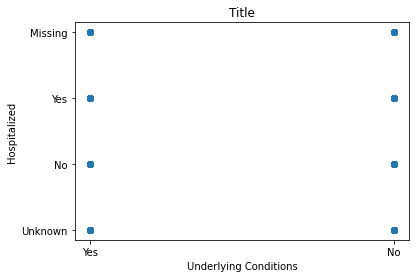

In [35]:
plt.scatter(xvalue, yvalues)

plt.ylabel('Hospitalized')
plt.title('Title')
plt.xlabel('Underlying Conditions')
plt.show()

If I want to plot the original dataframe where it only has full rows, I could use the following.
This has already crashed my laptop once though. 

In [ ]:
df_full_rows = df.dropna(how='any', axis=0)

In [29]:
df_full_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717124 entries, 140 to 26621963
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_month                       717124 non-null  object 
 1   res_state                        717124 non-null  object 
 2   state_fips_code                  717124 non-null  float64
 3   res_county                       717124 non-null  object 
 4   county_fips_code                 717124 non-null  float64
 5   age_group                        717124 non-null  object 
 6   sex                              717124 non-null  object 
 7   race                             717124 non-null  object 
 8   ethnicity                        717124 non-null  object 
 9   case_positive_specimen_interval  717124 non-null  float64
 10  case_onset_interval              717124 non-null  float64
 11  process                          717124 non-null  object 
 12

In [ ]:
x2value= df_full_rows['underlying_conditions_yn']
y2values = df_full_rows['hosp_yn']

In [ ]:
plt.bar(x2value, y2values)

plt.ylabel('Hospitalized')
plt.title('Title')
plt.xlabel('Underlying Conditions')
plt.show()

In [ ]:
save